## multi-class classification


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print("numpy      = ", np.__version__)
print("panda      = ", pd.__version__)
print("tensorflow = ", tf.__version__)
print("matplotlib = ", mpl.__version__)

np.random.seed(1)
tf.random.set_seed(1)

import warnings
warnings.filterwarnings(action='ignore')

numpy      =  1.21.6
panda      =  1.3.5
tensorflow =  2.8.0
matplotlib =  3.2.2


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Northkorea.csv to Northkorea.csv


In [3]:
data = pd.read_csv('Northkorea.csv')
data.head()

,agriculture,mining,manufacture,growth
0,2.6,-12.3,-13.9,low
1,-3.3,-15.3,-18.3,low
2,-8.0,-3.4,-2.0,low
3,2.8,-4.3,-3.9,low
4,-11.1,-4.1,-5.3,low


In [4]:
from sklearn.preprocessing import LabelEncoder

X = data.iloc[:,0:3].values
y = data.iloc[:,3].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

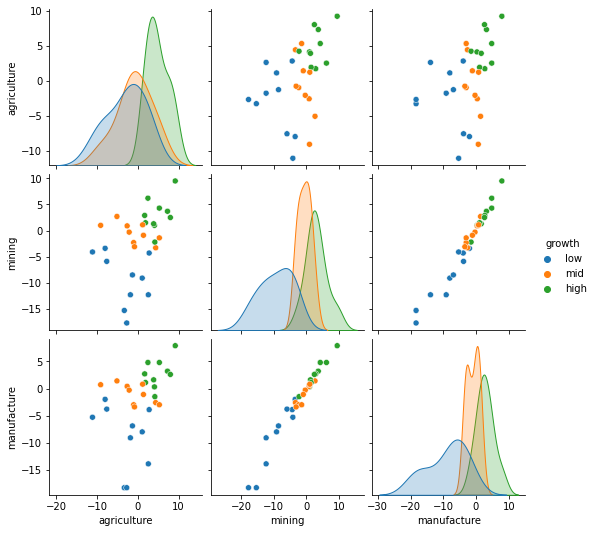

In [5]:
sns.pairplot(data, hue="growth")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24, 3), (6, 3), (24, 3), (6, 3))

In [7]:
x_train, y_train = np.array(x_train, dtype=np.float32), np.array(y_train, dtype=np.float32)
x_test,  y_test  = np.array(x_test, dtype=np.float32),  np.array(y_test, dtype=np.float32)

In [8]:
nb_samples = x_train.shape[0] # the number of samples, 8
nb_features= x_train.shape[1] # the number of input variables, 3
nb_classes = y_train.shape[1] # the number of output group, 3    print(nb_inputs, nb_classes)
print(nb_features, nb_classes)

learning_rate=0.01
epochs = 10001
display_step   = 500
batch_size = nb_samples

3 3


## naive

In [9]:
tf.random.set_seed(2020)
W = tf.Variable(tf.random.normal([nb_features, nb_classes], mean=0.0)) # (3,3)
b = tf.Variable(tf.random.normal([nb_classes],             mean=0.0))
print('# Weights: \n', W.numpy(), '\n\n# Bias: \n', b.numpy())

# hypothesis
def softmax(X):
    z = tf.matmul(X, W) + b   # (n,4) (4,3) + (3,)
    return tf.nn.softmax(z)     # (n,3)

# cost/loss function
def cost_fn(y_pred, y_true):    
    cost = tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1))       # (1,)
    #cost = (-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1)) / y_true.shape[0]  # (n,)
    return cost

#(4) stochastic gradient descent algorithm to minimize cost funtion
optimizer = tf.optimizers.SGD(learning_rate)

# Weights: 
 [[-0.10099822  0.6847899   1.6258513 ]
 [ 0.88112587 -0.63692456 -0.1427695 ]
 [ 0.82411087 -0.91326994 -0.4510184 ]] 

# Bias: 
 [ 0.38414612 -0.6159301  -0.5453214 ]


In [10]:
# training
loss_value = []
for step in range(epochs):   
    
    with tf.GradientTape() as g:
        pred = softmax(x_train)       #(8,3)
        cost = cost_fn(pred, y_train) #(8,3) (8,3) = (8,3) = (8,)
        loss_value.append(cost)
        #print('c = ', cost)
        
        #gradient 계산
        gradients = g.gradient(cost, [W,b])
    
    #gradients에 따라 W와 b 업데이트
    optimizer.apply_gradients(zip(gradients,[W,b])) 
    
    if step % display_step == 0:
        print("%s \t cost: %s" % (step, cost.numpy()))
        #print("step = {}, cost = {}, W = {}, b = {}".format(step+1, cost, W.numpy(), b.numpy()))   
        #print("step =", '%04d' % (step+1),"cost = {}, W = {}, b = {}".format(cost, W.numpy(), b.numpy())) # cost = 0.1571
        
print('*'*50)
print(f'y = {W.numpy()}x + {b.numpy()}')        

0 	 cost: 2.722904
500 	 cost: 0.32072914
1000 	 cost: 0.2500666
1500 	 cost: 0.21762097
2000 	 cost: 0.19776396
2500 	 cost: 0.18376088
3000 	 cost: 0.17308772
3500 	 cost: 0.16453025
4000 	 cost: 0.15742056
4500 	 cost: 0.15135707
5000 	 cost: 0.14608145
5500 	 cost: 0.14141881
6000 	 cost: 0.13724573
6500 	 cost: 0.13347204
7000 	 cost: 0.13003004
7500 	 cost: 0.12686758
8000 	 cost: 0.12394384
8500 	 cost: 0.12122622
9000 	 cost: 0.11868825
9500 	 cost: 0.11630821
10000 	 cost: 0.1140682
**************************************************
y = [[ 2.0289626  -0.07040556  0.25107756]
 [ 0.49482667 -1.448843    1.0554497 ]
 [ 1.1782092  -0.3305897  -1.3877922 ]]x + [-1.1045915 -2.4652555  2.7927434]


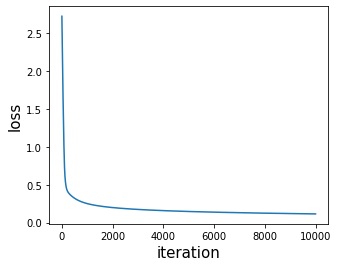

In [11]:
plt.figure(figsize = (5,4))
plt.plot(loss_value)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

In [12]:
w_hat = W.numpy()
b_hat = b.numpy()
print(w_hat)
print(b_hat)

[[ 2.0289626  -0.07040556  0.25107756]
 [ 0.49482667 -1.448843    1.0554497 ]
 [ 1.1782092  -0.3305897  -1.3877922 ]]
[-1.1045915 -2.4652555  2.7927434]


[[ 6  0  0]
 [ 0 10  0]
 [ 0  0  8]]


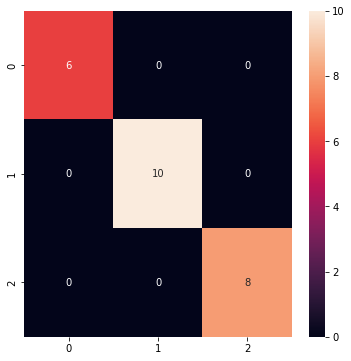

train
Report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

test
Report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [13]:
# 성과평가(train)
from sklearn.metrics import confusion_matrix
import seaborn as sns
#y_test = tf.one_hot(y_test, depth=nb_classes)

plt.figure(figsize=(6,6))
predict_value = softmax(x_train)
cm = confusion_matrix(np.argmax(y_train, axis=-1), np.argmax(predict_value, axis=-1))
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

print('train')
from sklearn.metrics import classification_report
y_actual    = np.argmax(y_train, axis=-1)
y_predicted = np.argmax(predict_value, axis=-1)
print('Report = \n', classification_report(y_actual, y_predicted))

print('test')
predict_value = softmax(x_test)
y_actual    = np.argmax(y_test, axis=-1)
y_predicted = np.argmax(predict_value, axis=-1)
print('Report = \n', classification_report(y_actual, y_predicted))
# macro avg, 단순평균
# weighted avg, 각 셀에 속하는 표본의 갯수로 가중평균

In [14]:
# Accuracy
def accuracy(X, Y):
    hypo  = softmax(X)
    pred  = tf.argmax(hypo, axis=1)
    label = tf.argmax(Y, axis=1)
    return tf.reduce_mean(tf.cast(tf.equal(pred, label), dtype=np.float32))

acc_train = accuracy(x_train, y_train)
print("Accuracy in train set = ", acc_train.numpy()*100)

acc_test = accuracy(x_test, y_test)
print("Accuracy in test set = ", acc_test.numpy()*100)

#from sklearn.metrics import classification_report
#print('Report = \n', classification_report(np.array(y_test, dtype=np.int64), tf.argmax(softmax(x_test), axis=-1)))

Accuracy in train set =  100.0
Accuracy in test set =  100.0


train
[1 1 2 0 2 1 1 0 1 2 0 2 1 1 2 1 2 1 2 2 0 0 0 1]
[1 1 2 0 2 1 1 0 1 2 0 2 1 1 2 1 2 1 2 2 0 0 0 1]


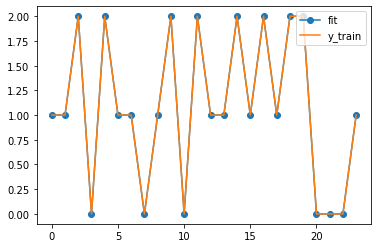

test
[0 0 0 2 0 2]
[0 0 0 2 0 2]


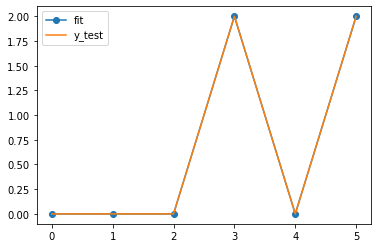

In [15]:
def predict(X):
    hypo = softmax(X)
    return tf.argmax(hypo, axis=1)  # (n,3)

print('train')
train_pred = predict(x_train).numpy()
y_origin = tf.argmax(y_train, axis=1).numpy()
print(train_pred)
print(y_origin)

plt.plot(train_pred, '-o', label='fit')
plt.plot(y_origin, '-', label='y_train')
plt.legend()
plt.show()


print('test')
test_pred = predict(x_test).numpy()
y_origin = tf.argmax(y_test, axis=1).numpy()
print(test_pred)
print(y_origin)

plt.plot(test_pred, '-o', label='fit')
plt.plot(y_origin, '-', label='y_test')
plt.legend()
plt.show()

In [16]:
x_new_data = np.array([[0, 0, 0]], dtype=np.float32)
x_pred = predict(x_new_data).numpy()
print('Predict  in new set  = ', x_pred)

Predict  in new set  =  [2]
